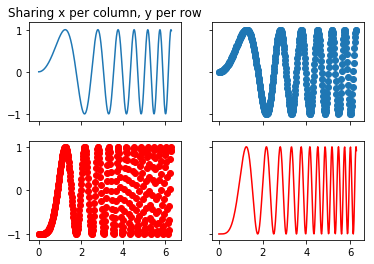

C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\figure_1


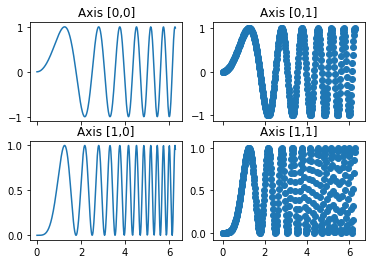

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2, sharex='col')
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
print file_destination
plt.savefig(file_destination+'.eps', format='eps', dpi=2000)
plt.show()

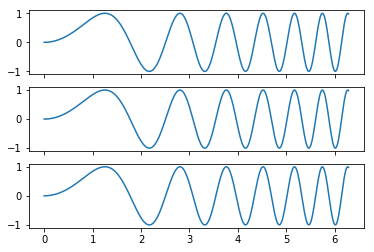

In [2]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, axarr = plt.subplots(3, 1, sharex='col')
for a in axarr:
    a.plot(x, y)
plt.show()

In [8]:
import numpy as np
from generate_noisy_data import generate_noisy_data
from generate_noisy_data import run_noisy_parameter_perturbation
from kotte_model import establish_kotte_flux_identifiability
from kotte_model import arrange_experimental_data
from process_ident_data import process_info
from plot_ident_results import flux_parameter_plot_data

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
all_options_exp_1 = []
all_options_exp_2 = []
all_options_exp_3 = []
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get initial noisy system steady state
initial_options = (cvode_options, ode_parameter_values)
noisy_initial_ss, _, _, _ = generate_noisy_data(y0, initial_options, 1)

# all parameter perturbations
parameter_perturbation = [(14, 0), (14, 4), (14, 9),
                          (11, .1), (11, .5), (11, 1), (11, -.1), (11, -.5),
                          (12, .1), (12, .5), (12, 1), (12, -.1), (12, -.5),
                          (13, .1), (13, .5), (13, 1), (13, -.1), (13, -.5)]
perturbation_options = {'ode_parameters':ode_parameter_values, 'cvode_options':cvode_options}
noisy_ss, noisy_dynamic, perturbation_details, _, dynamic_info = \
    run_noisy_parameter_perturbation(parameter_perturbation, noisy_initial_ss["y"], perturbation_options)
    
noisy_exp_xss = []
noisy_exp_fss = []
noisy_exp_ssid = []
for ss_values in noisy_ss:
    noisy_exp_xss.append(ss_values["y"])
    noisy_exp_fss.append(ss_values["flux"])
    noisy_exp_ssid.append(ss_values["ssid"])

# experimental data based on order of inputs for lambdify expressions
exp_flux_index = np.array([0, 3, 2, 4])
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(noisy_exp_xss, noisy_exp_fss, perturbation_details, 3, exp_flux_index)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=500)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = \
    process_info(ident_details,
                 experimental_datasets,
                 perturbation_details)



Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.408051108532 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 277
 Number of function evaluations                  : 353
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jac

Final Run Statistics: --- 

 Number of steps                                 : 353
 Number of function evaluations                  : 441
 Number of Jacobian evaluations                  : 7
 Number of function eval. due to Jacobian eval.  : 21
 Number of error test failures                   : 15
 Number of nonlinear iterations                  : 437
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.307148774823 seconds.
Perturbation 12

Final Run Statistics: --- 

 Number of steps                                 : 241
 Number of function evaluations                  : 311
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Ja

MemoryError: 

In [ ]:
# plot parameters for each flux and the number of data sets that enable their identification
flux_parameter_plot_data(original_data_ident)

Could not find GLIMDA
Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0288794917175 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 416
 Number of function evaluations                  : 551
 Number of Jacobian evaluations                  : 8
 Number of fu

Perturbation 11

Final Run Statistics: --- 

 Number of steps                                 : 336
 Number of function evaluations                  : 414
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 18
 Number of error test failures                   : 14
 Number of nonlinear iterations                  : 410
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0236039343548 seconds.
Perturbation 12

Final Run Statistics: --- 

 Number of steps                                 : 253
 Number of function evaluations                  : 310
 Number of Jacobian evaluations                  : 5
 Number of functi

kotte_model.py:283: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:300: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/\
kotte_model.py:404: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:421: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/\
kotte_model.py:530: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:548: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/ \
kotte_model.py:652: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:669: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x

Identifiability for Dataset 236 of 1000

Identifiability for Dataset 237 of 1000

Identifiability for Dataset 238 of 1000

Identifiability for Dataset 239 of 1000

Identifiability for Dataset 240 of 1000

Identifiability for Dataset 241 of 1000

Identifiability for Dataset 242 of 1000

Identifiability for Dataset 243 of 1000

Identifiability for Dataset 244 of 1000

Identifiability for Dataset 245 of 1000

Identifiability for Dataset 246 of 1000

Identifiability for Dataset 247 of 1000

Identifiability for Dataset 248 of 1000

Identifiability for Dataset 249 of 1000

Identifiability for Dataset 250 of 1000

Identifiability for Dataset 251 of 1000

Identifiability for Dataset 252 of 1000

Identifiability for Dataset 253 of 1000

Identifiability for Dataset 254 of 1000

Identifiability for Dataset 255 of 1000

Identifiability for Dataset 256 of 1000

Identifiability for Dataset 257 of 1000

Identifiability for Dataset 258 of 1000

Identifiability for Dataset 259 of 1000

Identifiability 


Identifiability for Dataset 460 of 1000

Identifiability for Dataset 461 of 1000

Identifiability for Dataset 462 of 1000

Identifiability for Dataset 463 of 1000

Identifiability for Dataset 464 of 1000

Identifiability for Dataset 465 of 1000

Identifiability for Dataset 466 of 1000

Identifiability for Dataset 467 of 1000

Identifiability for Dataset 468 of 1000

Identifiability for Dataset 469 of 1000

Identifiability for Dataset 470 of 1000

Identifiability for Dataset 471 of 1000

Identifiability for Dataset 472 of 1000

Identifiability for Dataset 473 of 1000

Identifiability for Dataset 474 of 1000

Identifiability for Dataset 475 of 1000

Identifiability for Dataset 476 of 1000

Identifiability for Dataset 477 of 1000

Identifiability for Dataset 478 of 1000

Identifiability for Dataset 479 of 1000

Identifiability for Dataset 480 of 1000

Identifiability for Dataset 481 of 1000

Identifiability for Dataset 482 of 1000

Identifiability for Dataset 483 of 1000

Identifiability

Identifiability for Dataset 686 of 1000

Identifiability for Dataset 687 of 1000

Identifiability for Dataset 688 of 1000

Identifiability for Dataset 689 of 1000

Identifiability for Dataset 690 of 1000

Identifiability for Dataset 691 of 1000

Identifiability for Dataset 692 of 1000

Identifiability for Dataset 693 of 1000

Identifiability for Dataset 694 of 1000

Identifiability for Dataset 695 of 1000

Identifiability for Dataset 696 of 1000

Identifiability for Dataset 697 of 1000

Identifiability for Dataset 698 of 1000

Identifiability for Dataset 699 of 1000

Identifiability for Dataset 700 of 1000

Identifiability for Dataset 701 of 1000

Identifiability for Dataset 702 of 1000

Identifiability for Dataset 703 of 1000

Identifiability for Dataset 704 of 1000

Identifiability for Dataset 705 of 1000

Identifiability for Dataset 706 of 1000

Identifiability for Dataset 707 of 1000

Identifiability for Dataset 708 of 1000

Identifiability for Dataset 709 of 1000

Identifiability 

Identifiability for Dataset 915 of 1000

Identifiability for Dataset 916 of 1000

Identifiability for Dataset 917 of 1000

Identifiability for Dataset 918 of 1000

Identifiability for Dataset 919 of 1000

Identifiability for Dataset 920 of 1000

Identifiability for Dataset 921 of 1000

Identifiability for Dataset 922 of 1000

Identifiability for Dataset 923 of 1000

Identifiability for Dataset 924 of 1000

Identifiability for Dataset 925 of 1000

Identifiability for Dataset 926 of 1000

Identifiability for Dataset 927 of 1000

Identifiability for Dataset 928 of 1000

Identifiability for Dataset 929 of 1000

Identifiability for Dataset 930 of 1000

Identifiability for Dataset 931 of 1000

Identifiability for Dataset 932 of 1000

Identifiability for Dataset 933 of 1000

Identifiability for Dataset 934 of 1000

Identifiability for Dataset 935 of 1000

Identifiability for Dataset 936 of 1000

Identifiability for Dataset 937 of 1000

Identifiability for Dataset 938 of 1000

Identifiability 

kotte_model.py:851: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


Original Data sets that can detect 11 parameters: 1
Combination Data sets for more parameters: 0
Original Data sets that can detect 10 parameters: 11
Combination Data sets for more parameters: 1387
Original Data sets that can detect 9 parameters: 78
Combination Data sets for more parameters: 49088
Original Data sets that can detect 8 parameters: 212
Combination Data sets for more parameters: 186598
Original Data sets that can detect 7 parameters: 184
Combination Data sets for more parameters: 242884
Original Data sets that can detect 6 parameters: 99
Combination Data sets for more parameters: 201577
Original Data sets that can detect 5 parameters: 60
Combination Data sets for more parameters: 158958
Original Data sets that can detect 4 parameters: 110
Combination Data sets for more parameters: 346633
Original Data sets that can detect 3 parameters: 111
Combination Data sets for more parameters: 416804
Original Data sets that can detect 2 parameters: 53
Combination Data sets for more pa

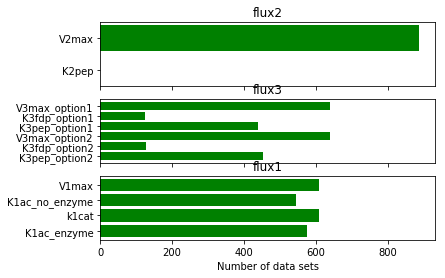

In [1]:
import numpy as np
from generate_expdata import generate_expdata
from kotte_model import establish_kotte_flux_identifiability
from kotte_model import arrange_experimental_data
from process_ident_data import process_info
from kotte_model import write_results_2_file
from plot_ident_results import flux_parameter_plot_data


# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get noisy experimental system steady state data
noisy_exp_xss, noisy_exp_fss, noisy_exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(noisy_exp_xss, noisy_exp_fss, perturbation_details, 3, exp_flux_index)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=1000)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = process_info(ident_details,
                                                                               experimental_datasets,
                                                                               perturbation_details)

# plot results
file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
flux_parameter_plot_data(original_data_ident)

Could not find GLIMDA
Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0295727778834 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of functi

Final Run Statistics: --- 

 Number of steps                                 : 237
 Number of function evaluations                  : 301
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jacobian eval.  : 15
 Number of error test failures                   : 13
 Number of nonlinear iterations                  : 297
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.01601317633 seconds.
Perturbation 13

Final Run Statistics: --- 

 Number of steps                                 : 294
 Number of function evaluations                  : 374
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jac

kotte_model.py:128: RuntimeWarning: invalid value encountered in double_scalars
  k1cat_enzyme_value = k1cat_enzyme_numerator_value/k1cat_enzyme_denominator_value
kotte_model.py:131: RuntimeWarning: invalid value encountered in double_scalars
  k1ac_enzyme_value = k1ac_enzyme_numerator_value/k1ac_enzyme_denominator_value
kotte_model.py:283: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:300: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/\
kotte_model.py:404: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:421: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x11*x12*x13*x22*x23 - v31*v33*x11*x12*x13*x22*x23))))/\
kotte_model.py:530: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:548: RuntimeWarning: invalid v


Identifiability for Dataset 245 of 1100

Identifiability for Dataset 246 of 1100

Identifiability for Dataset 247 of 1100

Identifiability for Dataset 248 of 1100

Identifiability for Dataset 249 of 1100

Identifiability for Dataset 250 of 1100

Identifiability for Dataset 251 of 1100

Identifiability for Dataset 252 of 1100

Identifiability for Dataset 253 of 1100

Identifiability for Dataset 254 of 1100

Identifiability for Dataset 255 of 1100

Identifiability for Dataset 256 of 1100

Identifiability for Dataset 257 of 1100

Identifiability for Dataset 258 of 1100

Identifiability for Dataset 259 of 1100

Identifiability for Dataset 260 of 1100

Identifiability for Dataset 261 of 1100

Identifiability for Dataset 262 of 1100

Identifiability for Dataset 263 of 1100

Identifiability for Dataset 264 of 1100

Identifiability for Dataset 265 of 1100

Identifiability for Dataset 266 of 1100

Identifiability for Dataset 267 of 1100

Identifiability for Dataset 268 of 1100

Identifiability

Identifiability for Dataset 477 of 1100

Identifiability for Dataset 478 of 1100

Identifiability for Dataset 479 of 1100

Identifiability for Dataset 480 of 1100

Identifiability for Dataset 481 of 1100

Identifiability for Dataset 482 of 1100

Identifiability for Dataset 483 of 1100

Identifiability for Dataset 484 of 1100

Identifiability for Dataset 485 of 1100

Identifiability for Dataset 486 of 1100

Identifiability for Dataset 487 of 1100

Identifiability for Dataset 488 of 1100

Identifiability for Dataset 489 of 1100

Identifiability for Dataset 490 of 1100

Identifiability for Dataset 491 of 1100

Identifiability for Dataset 492 of 1100

Identifiability for Dataset 493 of 1100

Identifiability for Dataset 494 of 1100

Identifiability for Dataset 495 of 1100

Identifiability for Dataset 496 of 1100

Identifiability for Dataset 497 of 1100

Identifiability for Dataset 498 of 1100

Identifiability for Dataset 499 of 1100

Identifiability for Dataset 500 of 1100

Identifiability 


Identifiability for Dataset 722 of 1100

Identifiability for Dataset 723 of 1100

Identifiability for Dataset 724 of 1100

Identifiability for Dataset 725 of 1100

Identifiability for Dataset 726 of 1100

Identifiability for Dataset 727 of 1100

Identifiability for Dataset 728 of 1100

Identifiability for Dataset 729 of 1100

Identifiability for Dataset 730 of 1100

Identifiability for Dataset 731 of 1100

Identifiability for Dataset 732 of 1100

Identifiability for Dataset 733 of 1100

Identifiability for Dataset 734 of 1100

Identifiability for Dataset 735 of 1100

Identifiability for Dataset 736 of 1100

Identifiability for Dataset 737 of 1100

Identifiability for Dataset 738 of 1100

Identifiability for Dataset 739 of 1100

Identifiability for Dataset 740 of 1100

Identifiability for Dataset 741 of 1100

Identifiability for Dataset 742 of 1100

Identifiability for Dataset 743 of 1100

Identifiability for Dataset 744 of 1100

Identifiability for Dataset 745 of 1100

Identifiability


Identifiability for Dataset 964 of 1100

Identifiability for Dataset 965 of 1100

Identifiability for Dataset 966 of 1100

Identifiability for Dataset 967 of 1100

Identifiability for Dataset 968 of 1100

Identifiability for Dataset 969 of 1100

Identifiability for Dataset 970 of 1100

Identifiability for Dataset 971 of 1100

Identifiability for Dataset 972 of 1100

Identifiability for Dataset 973 of 1100

Identifiability for Dataset 974 of 1100

Identifiability for Dataset 975 of 1100

Identifiability for Dataset 976 of 1100

Identifiability for Dataset 977 of 1100

Identifiability for Dataset 978 of 1100

Identifiability for Dataset 979 of 1100

Identifiability for Dataset 980 of 1100

Identifiability for Dataset 981 of 1100

Identifiability for Dataset 982 of 1100

Identifiability for Dataset 983 of 1100

Identifiability for Dataset 984 of 1100

Identifiability for Dataset 985 of 1100

Identifiability for Dataset 986 of 1100

Identifiability for Dataset 987 of 1100

Identifiability

kotte_model.py:851: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


Original Data sets that can detect 11 parameters: 6
Combination Data sets for more parameters: 96
Original Data sets that can detect 10 parameters: 30
Combination Data sets for more parameters: 9250
Original Data sets that can detect 9 parameters: 116
Combination Data sets for more parameters: 94002
Original Data sets that can detect 8 parameters: 191
Combination Data sets for more parameters: 239366
Original Data sets that can detect 7 parameters: 193
Combination Data sets for more parameters: 334195
Original Data sets that can detect 6 parameters: 78
Combination Data sets for more parameters: 201250
Original Data sets that can detect 5 parameters: 105
Combination Data sets for more parameters: 331127
Original Data sets that can detect 4 parameters: 159
Combination Data sets for more parameters: 571526
Original Data sets that can detect 3 parameters: 143
Combination Data sets for more parameters: 596880
Original Data sets that can detect 2 parameters: 50
Combination Data sets for more

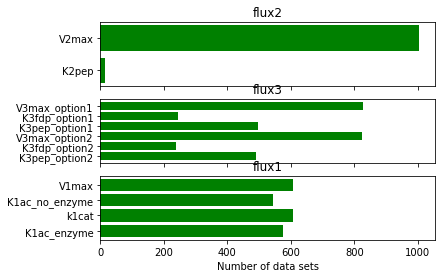

In [1]:
import numpy as np
from generate_expdata import generate_expdata
from kotte_model import establish_kotte_flux_identifiability
from kotte_model import arrange_experimental_data
from process_ident_data import process_info
from plot_ident_results import flux_parameter_plot_data

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=1100)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = process_info(ident_details,
                                                                               experimental_datasets,
                                                                               perturbation_details)

# plot results
file_destination = 'C:\Users\shyam\Documents\Courses\CHE1125Project\Results\ident\python2\\figure_1'
# plot parameters for each flux and the number of data sets that enable their identification
flux_parameter_plot_data(original_data_ident)